In [ ]:
import tensorflow as tf
dataset = tf.keras.utils.get_file(
    'cats_and_dogs_filtered.zip',
    origin='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
    extract=True)


68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls /root/.keras/datasets/cats_and_dogs_filtered



ls: cannot access '/root/.keras/datasets/cats_and_dogs_filtered': No such file or directory


In [ ]:
import tensorflow as tf
dataset = tf.keras.utils.get_file(
    'cats_and_dogs_filtered.zip',
    origin='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
    extract=True)


In [ ]:
import os
dataset_path = os.path.join(os.path.dirname(dataset), 'cats_and_dogs_filtered')
print(dataset_path)
!ls $dataset_path



/root/.keras/datasets/cats_and_dogs_filtered
ls: cannot access '/root/.keras/datasets/cats_and_dogs_filtered': No such file or directory


In [ ]:
import tensorflow as tf
import zipfile
import os

# Download the zip file manually
dataset_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
dataset_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=dataset_url)

# Extract it to the current directory
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Verify it worked
!ls /content/cats_and_dogs_filtered



train  validation  vectorize.py


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


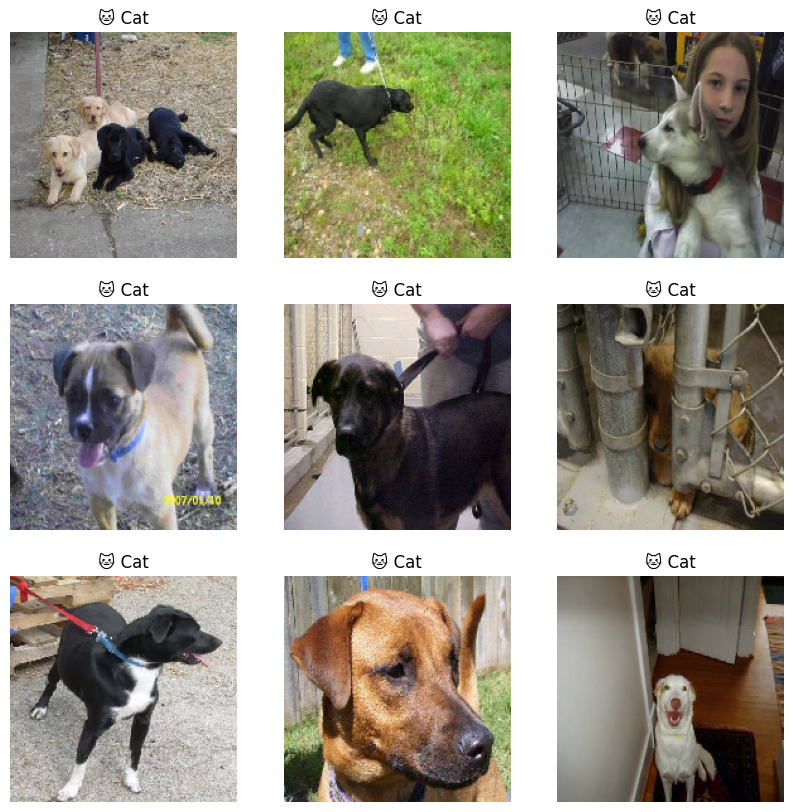

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image

# folder of test images (you can use validation folder)
test_folder = "/content/cats_and_dogs_filtered/validation/dogs"

plt.figure(figsize=(10, 10))
for i, img_name in enumerate(os.listdir(test_folder)[:9]):  # show 9 images
    img_path = os.path.join(test_folder, img_name)
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    score = predictions[0]

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis("off")
    label = "🐶 Dog" if score > 0.5 else "🐱 Cat"
    plt.title(label)
plt.show()


In [ ]:
from tensorflow.keras.models import Model

# pick the first Conv layer
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# pick one image
img_path = '/content/surukid.17.16_c29847b3.jpg'
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# get activations
activations = activation_model.predict(img_array)

# show first layer feature maps
plt.figure(figsize=(15, 8))
for i in range(8):  # first 8 filters
    plt.subplot(2, 4, i + 1)
    plt.imshow(activations[0][0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()


AttributeError: The layer sequential_1 has never been called and thus has no defined input.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

train_dir = '/content/cats_and_dogs_filtered/train'
val_dir = '/content/cats_and_dogs_filtered/validation'

# Load and preprocess the images
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(150, 150),
    batch_size=32
)

# Improve performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(150, 150, 3)),   # Normalize pixel values (0–1)

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification (cat vs dog)
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

NameError: name 'train_dataset' is not defined

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.4959 - loss: 0.7414 - val_accuracy: 0.6520 - val_loss: 0.6894
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.5437 - loss: 0.6866 - val_accuracy: 0.5500 - val_loss: 0.6555
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.6340 - loss: 0.6466 - val_accuracy: 0.6300 - val_loss: 0.6347
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.6882 - loss: 0.5761 - val_accuracy: 0.7040 - val_loss: 0.5912
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.7638 - loss: 0.4825 - val_accuracy: 0.7140 - val_loss: 0.5671
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.7841 - loss: 0.4540 - val_accuracy: 0.7040 - val_loss: 0.6162
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.8330 - loss: 0.3674 - val_accuracy: 0.7090 - val_loss: 0.6332
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.8896 - loss: 0.2568 - val_accuracy: 0.7160 - v

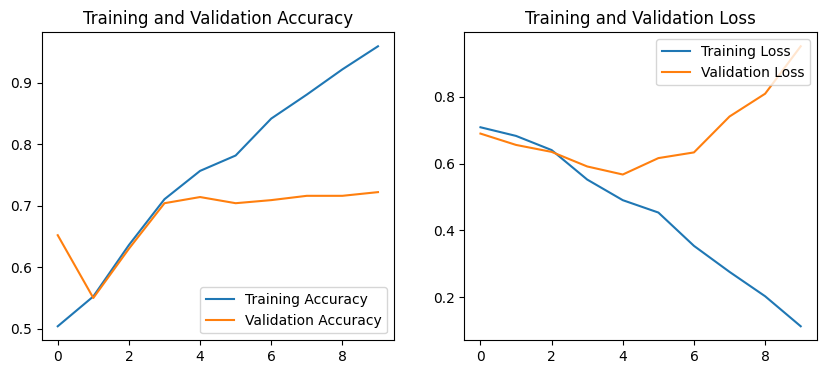

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Replace with your uploaded image name
img_path = "surukid.17.16_c29847b3.jpg"  # example: cat1.png

# Load and preprocess the image
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # make batch dimension

predictions = model.predict(img_array)
score = predictions[0]

if score < 0.5:
    print("🐱 It's a CAT!")
else:
    print("🐶 It's a DOG!")


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 36992, but received input with shape (1, 51200)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 180, 180, 3), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
import tensorflow as tf

# Recreate your model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2)


SyntaxError: incomplete input (ipython-input-3213780765.py, line 10)

In [ ]:
import tensorflow as tf

# Recreate your model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile same as before
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Load your saved weights (update the path if you saved elsewhere)
model.load_weights('/root/.keras/datasets/cats_and_dogs_filtered/checkpoints/my_model_weights')
print("✅ Model weights loaded successfully!")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: File format not supported: filepath=/root/.keras/datasets/cats_and_dogs_filtered/checkpoints/my_model_weights. Keras 3 only supports V3 `.keras` and `.weights.h5` files, or legacy V1/V2 `.h5` files.

In [ ]:
model.save('/content/cats_and_dogs_filtered/my_model.keras')
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the saved model
model = tf.keras.models.load_model('/content/cats_and_dogs_filtered/my_model.keras')

# Load and preprocess your image
img_path = '/content/surukid.17.16_c29847b3.jpg'  # your uploaded image
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # add batch dimension

# Predict
predictions = model.predict(img_array)
score = predictions[0]

if score < 0.5:
    print("🐱 It's a CAT!")
else:
    print("🐶 It's a DOG!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
🐱 It's a CAT!


In [ ]:
from tensorflow.keras.models import Model

# pick the first Conv layer
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# pick one image
img_path = '/content/surukid.17.16_c29847b3.jpg'
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# get activations
activations = activation_model.predict(img_array)

# show first layer feature maps
plt.figure(figsize=(15, 8))
for i in range(8):  # first 8 filters
    plt.subplot(2, 4, i + 1)
    plt.imshow(activations[0][0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()


AttributeError: The layer sequential_1 has never been called and thus has no defined input.

In [ ]:
model.predict(tf.zeros((1, 180, 180, 3)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([[0.5]], dtype=float32)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Make sure model has been called at least once
model.predict(tf.zeros((1, 180, 180, 3)))

# pick the first Conv layers
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# pick one image
img_path = '/content/surukid.17.16_c29847b3.jpg'
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# get activations
activations = activation_model.predict(img_array)

# show first layer feature maps
plt.figure(figsize=(15, 8))
for i in range(8):  # show first 8 filters
    plt.subplot(2, 4, i + 1)
    plt.imshow(activations[0][0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


AttributeError: The layer sequential_1 has never been called and thus has no defined input.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


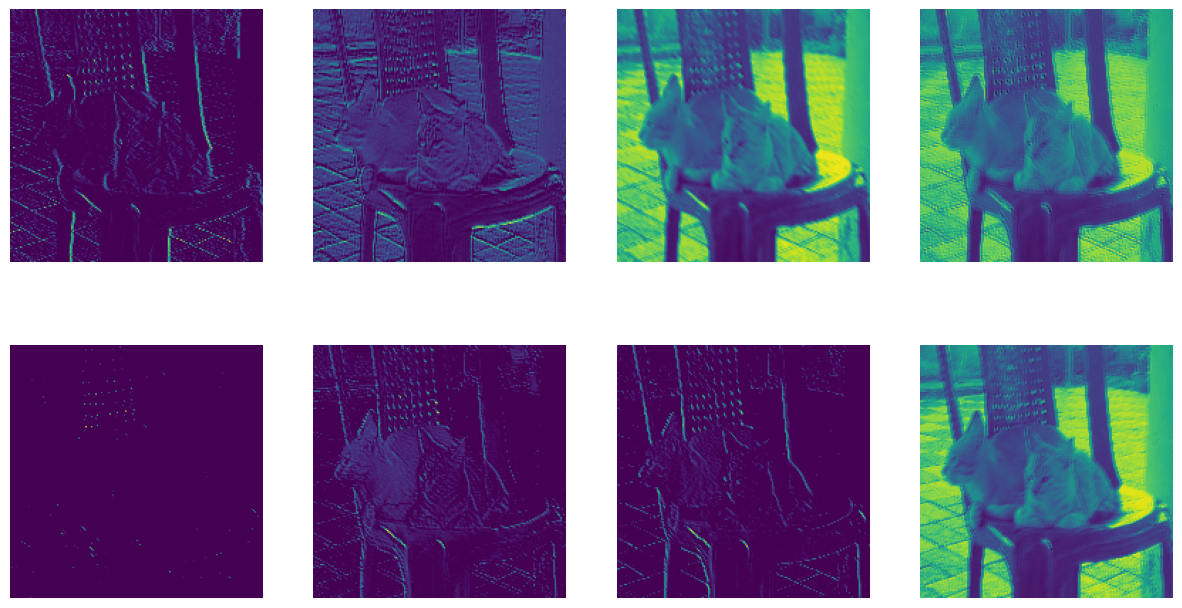

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Just to ensure model is ready
model.predict(tf.zeros((1, 180, 180, 3)))

# ✅ use the first layer’s input
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.layers[0].input, outputs=layer_outputs)

# pick one image
img_path = '/content/surukid.17.16_c29847b3.jpg'
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# get activations
activations = activation_model.predict(img_array)

# show first layer feature maps
plt.figure(figsize=(15, 8))
for i in range(8):  # show first 8 filters
    plt.subplot(2, 4, i + 1)
    plt.imshow(activations[0][0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()


In [ ]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.6 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image

# 🧠 Load the trained model
model = tf.keras.models.load_model("/content/cats_dogs_model.keras")

# 🎨 App title
st.title("🐾 Cat vs Dog Classifier")

# 📤 File uploader
uploaded_file = st.file_uploader("Upload an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # 🧮 Preprocess image
    img = image.resize((180, 180))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # 🔍 Prediction
    predictions = model.predict(img_array)
    score = predictions[0]

    # 🐱🐶 Show result
    if score < 0.5:
        st.success("It's a **Cat! 🐱**")
    else:
        st.success("It's a **Dog! 🐶**")


Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501


⠙

⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.72.222:8501

  Stopping...
^C


In [ ]:
!pip install pyngrok cloudflared -q



  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
!streamlit run app.py & npx kill-port 8501 & !cloudflared tunnel --url http://localhost:8501


/bin/bash: line 1: !cloudflared: command not found
⠙⠹⠸

⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧Need to install the following packages:
kill-port@2.0.1
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.72.222:8501



In [ ]:
!pip install colab-tunnel


ERROR: Could not find a version that satisfies the requirement colab-tunnel (from versions: none)
ERROR: No matching distribution found for colab-tunnel


In [ ]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
added 22 packages in 3s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏

In [ ]:
# Start Streamlit as a background process
!streamlit run app.py &

# Wait 5 seconds for the server to start
import time
time.sleep(5)

# Expose port 8501 using localtunnel
!lt --port 8501


/bin/bash: line 1: streamlit: command not found
your url is: https://all-numbers-go.loca.lt
/tools/node/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:12271 (check your firewall settings)
    at Socket.<anonymous> (/tools/node/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0


In [1]:
Runtime → Restart runtime


SyntaxError: invalid character '→' (U+2192) (ipython-input-3605337568.py, line 1)